In [1]:
system("defaults write org.R-project.R force.LANG zh_TW.UTF-8")

# Import Library

In [2]:
library(NLP)
library(tm)
library(stats)
library(proxy)
library(dplyr)
library(readtext)
library(jiebaRD)
library(jiebaR)
library(slam)
library(Matrix)
library(tidytext)


Attaching package: ‘proxy’

The following objects are masked from ‘package:stats’:

    as.dist, dist

The following object is masked from ‘package:base’:

    as.matrix


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
rawData = readtext("*.txt")
docs = Corpus(VectorSource(rawData$text))

In [4]:
docs

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 7

# data clean

In [5]:
toSpace <- content_transformer(function(x, pattern) {
  return (gsub(pattern, " ", x))
})
docs <- tm_map(docs, removePunctuation)
docs <- tm_map(docs, removeNumbers)
docs <- tm_map(docs, stripWhitespace)
docs <- tm_map(docs, toSpace, "[a-zA-Z]")


Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, toSpace, "[a-zA-Z]"):
“transformation drops documents”

# words cut

In [6]:
# keywords = read.csv("keywords.csv", fileEncoding = "BIG-5")
mixseg = worker()
# keys = as.matrix(keywords)
# new_user_word(mixseg, keys)

jieba_tokenizer = function(d){
  unlist(segment(d[[1]], mixseg))
}
seg = lapply(docs, jieba_tokenizer)
freqFrame = as.data.frame(table(unlist(seg)))

d.corpus <- Corpus(VectorSource(seg))
tdm <- TermDocumentMatrix(d.corpus)
print( tf <- as.matrix(tdm) )
DF <- tidy(tf)

          Docs
Terms       1  2  3  4  5  6  7
  不想      6  0  0  0  2  0  0
  不愛我    4  0  0  0  0  0  0
  不是      4  0  1  0  0  2  0
  不要      7  1  4  0  1  4  0
  不讓      2  0  0  0  2  0  0
  之前      3  0  0  0  0  0  0
  了        3  3  5  4  1  9  0
  人要      4  0  1  0  0  0  0
  他        2  0  0  0  0  2  0
  作曲      1  1  1  1  1  1  1
  作詞      1  1  1  1  1  1  1
  你       24 13  8 26 18 30  5
  冒        3  0  0  0  0  0  0
  剛好      5  0  0  0  0  0  0
  加速      3  0  0  0  0  0  0
  又        4  0  0  2  0  0  0
  反正      4  0  0  0  0  2  0
  可以      3  1  0  0  1  0  1
  周杰倫    3  2  3  3  3  3  2
  哥練      4  0  0  0  0  0  0
  在        3  4  5  8 10  2  3
  外套      3  0  0  0  0  0  0
  套牢      3  0  0  0  0  0  0
  好        4  0  0  1  0  2  0
  好膽      3  0  0  0  0  0  0
  如果      4  0  1  0  0  0  0
  安全帽    3  0  0  0  0  0  0
  宋健彰    1  0  0  0  0  0  0
  寒        3  0  0  0  0  0  0
  就       11  0  5  0  3  0  1
  幸福      5  0  0  0  3  0  1
  彈頭      1  0  0 

Warning message:
“'tidy.matrix' is deprecated.
See help("Deprecated")”

# tf-idf computation

In [7]:
N = tdm$ncol
tf <- apply(tdm, 2, sum)
idfCal <- function(word_doc)
{ 
  log2( N / nnzero(word_doc) ) 
}
idf <- apply(tdm, 1, idfCal)

doc.tfidf <- as.matrix(tdm)
for(x in 1:nrow(tdm))
{
  for(y in 1:ncol(tdm))
  {
    doc.tfidf[x,y] <- (doc.tfidf[x,y] / tf[y]) * idf[x]
  }
}

findZeroId = as.matrix(apply(doc.tfidf, 1, sum))
tfidfnn = doc.tfidf[-which(findZeroId == 0),]

In [8]:
tfidfnn

,1,2,3,4,5,6,7
不想,0.049291498,0.000000000,0.000000000,0.000000000,0.0086683689,0.000000000,0.000000000
不愛我,0.051042817,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000
不是,0.022225317,0.000000000,0.004304199,0.000000000,0.0000000000,0.006886718,0.000000000
不要,0.015445399,0.001216609,0.006836998,0.000000000,0.0011640931,0.005469598,0.000000000
不讓,0.016430499,0.000000000,0.000000000,0.000000000,0.0086683689,0.000000000,0.000000000
之前,0.038282113,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000
了,0.003032624,0.001672123,0.003915360,0.003395304,0.0005333152,0.005638118,0.000000000
人要,0.032860999,0.000000000,0.006363926,0.000000000,0.0000000000,0.000000000,0.000000000
他,0.016430499,0.000000000,0.000000000,0.000000000,0.0000000000,0.010182281,0.000000000
冒,0.038282113,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000


In [9]:
doc.tfidf

,1,2,3,4,5,6,7
不想,0.049291498,0.000000000,0.000000000,0.000000000,0.0086683689,0.000000000,0.000000000
不愛我,0.051042817,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000
不是,0.022225317,0.000000000,0.004304199,0.000000000,0.0000000000,0.006886718,0.000000000
不要,0.015445399,0.001216609,0.006836998,0.000000000,0.0011640931,0.005469598,0.000000000
不讓,0.016430499,0.000000000,0.000000000,0.000000000,0.0086683689,0.000000000,0.000000000
之前,0.038282113,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000
了,0.003032624,0.001672123,0.003915360,0.003395304,0.0005333152,0.005638118,0.000000000
人要,0.032860999,0.000000000,0.006363926,0.000000000,0.0000000000,0.000000000,0.000000000
他,0.016430499,0.000000000,0.000000000,0.000000000,0.0000000000,0.010182281,0.000000000
作曲,0.000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000,0.000000000


In [10]:
write.csv(doc.tfidf, "show.csv", fileEncoding="big-5")

Warning message in write.table(doc.tfidf, "show.csv", fileEncoding = "big-5", col.names = NA, :
“invalid char string in output conversion”Warning message in write.table(doc.tfidf, "show.csv", fileEncoding = "big-5", col.names = NA, :
“invalid char string in output conversion”Warning message in write.table(doc.tfidf, "show.csv", fileEncoding = "big-5", col.names = NA, :
“invalid char string in output conversion”

In [11]:
freq=rowSums(as.matrix(tdm))
head(freq,20)

不想 不愛我   不是   不要   不讓   之前     了   人要     他   作曲   作詞 
     8      4      7     17      4      3     25      5      4      7      7 
    你     冒   剛好   加速     又   反正   可以 周杰倫   哥練 
   124      3      5      3      6      6      6     19      4

In [12]:
library(ggplot2)


Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate



In [13]:
tail(freq,20)

的給     睛 窗台上   竹籬     簷   約定 紅了眼   緣分   聲音   聽見   臉上 
     1      1      1      1      1      1      1      1      6      5      1 
  表情 裡插滿   輕敲   過境   關於   雨滴   青苔   靠近   鮮明 
     2      1      1      1      2      1      1      1      1

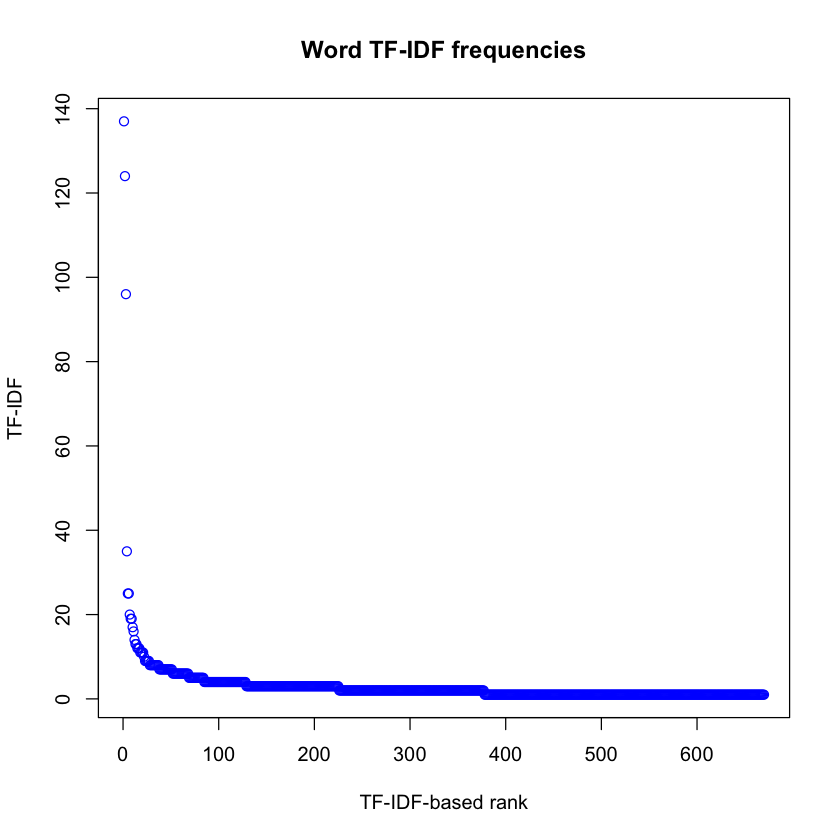

In [14]:
plot(sort(freq, decreasing = T),col="blue",main="Word TF-IDF frequencies", xlab="TF-IDF-based rank", ylab = "TF-IDF")

In [15]:
tail(sort(freq),n=20)

還     都     要     看   記得     聽     她   媽媽   的話     是   不要 
    11     11     11     12     12     12     13     13     14     16     17 
周杰倫     說     就     了     著     在     我     你     的 
    19     19     20     25     25     35     96    124    137

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <e4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <8d>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <e8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <a6>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conve

“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <ab>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '說' in 'mbcsToSbcs': dot substituted for <e8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '說' in 'mbcsToSbcs': dot substituted for <aa>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '說' in 'mbcsToSbcs': dot substituted for <aa>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '就' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '就' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '就' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid

“conversion failure on '在' in 'mbcsToSbcs': dot substituted for <a8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '我' in 'mbcsToSbcs': dot substituted for <e6>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '我' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '我' in 'mbcsToSbcs': dot substituted for <91>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '你' in 'mbcsToSbcs': dot substituted for <e4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '你' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '你' in 'mbcsToSbcs': dot substituted for <a0>”Warning message in grid.C

“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <91>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <a8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <e6>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <9d>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <b0>”Warning mess

“conversion failure on '就' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '了' in 'mbcsToSbcs': dot substituted for <e4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '了' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '了' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '著' in 'mbcsToSbcs': dot substituted for <e8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '著' in 'mbcsToSbcs': dot substituted for <91>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '著' in 'mbcsToSbcs': dot substituted for <97>”Warning message in grid.C

“conversion failure on '你' in 'mbcsToSbcs': dot substituted for <a0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '的' in 'mbcsToSbcs': dot substituted for <e7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '的' in 'mbcsToSbcs': dot substituted for <9a>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '的' in 'mbcsToSbcs': dot substituted for <84>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <e4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <8d>”Warning message in gri

“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <ab>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '說' in 'mbcsToSbcs': dot substituted for <e8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '說' in 'mbcsToSbcs': dot substituted for <aa>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '說' in 'mbcsToSbcs': dot substituted for <aa>”Warning message i

“conversion failure on '著' in 'mbcsToSbcs': dot substituted for <97>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '在' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '在' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '在' in 'mbcsToSbcs': dot substituted for <a8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '我' in 'mbcsToSbcs': dot substituted for <e6>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '我' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '我' in 'mbcsToSbcs': dot substituted for <91>”Warning message in grid.C

“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <8d>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <e8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <a6>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '不要' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <91>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <a8>”Warning message

“conversion failure on '說' in 'mbcsToSbcs': dot substituted for <aa>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '就' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '就' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '就' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '了' in 'mbcsToSbcs': dot substituted for <e4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '了' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '了' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.C

“conversion failure on '我' in 'mbcsToSbcs': dot substituted for <91>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '你' in 'mbcsToSbcs': dot substituted for <e4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '你' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '你' in 'mbcsToSbcs': dot substituted for <a0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '的' in 'mbcsToSbcs': dot substituted for <e7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '的' in 'mbcsToSbcs': dot substituted for <9a>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '的' in 'mbcsToSbcs': dot substituted for <84>”Warning message in grid.C

“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <a8>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <e6>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <9d>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '周杰倫' in 'mbcsToSbcs': dot substituted fo

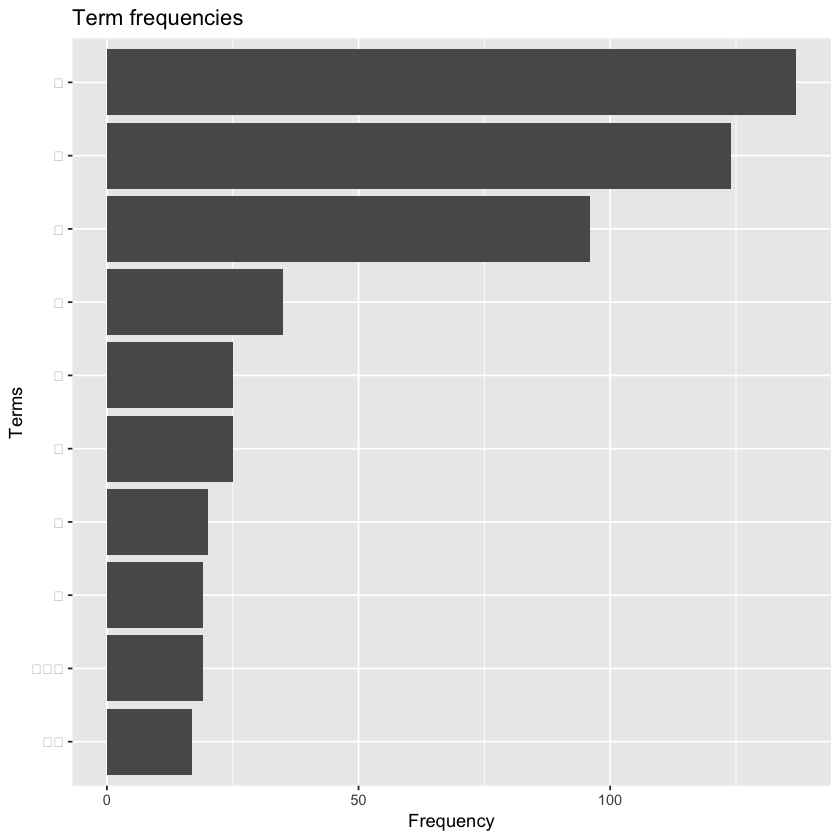

In [18]:
high.freq=tail(sort(freq),n=10)
hfp.df=as.data.frame(sort(high.freq))
hfp.df$names <- rownames(hfp.df) 

ggplot(hfp.df, aes(reorder(names,high.freq), high.freq)) +
  geom_bar(stat="identity") + coord_flip() + 
  xlab("Terms") + ylab("Frequency") +
  ggtitle("Term frequencies")